In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
sbn.set(color_codes=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import keras
from keras import models,layers,optimizers

In [4]:
from keras.datasets import fashion_mnist

In [6]:
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [7]:
print(train_x.shape,train_y.shape)

(60000, 28, 28) (60000,)


In [8]:
print(test_x.shape,test_y.shape)

(10000, 28, 28) (10000,)


In [10]:
classes_test=np.unique(test_y)
print(classes_test)

[0 1 2 3 4 5 6 7 8 9]


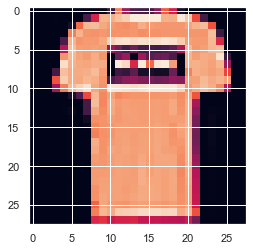

In [11]:
plt.imshow(train_x[1])

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


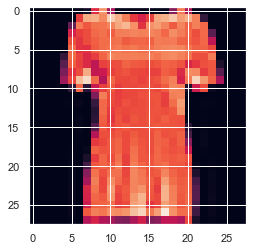

In [13]:
print(plt.imshow(train_x[2]))


AxesImage(54,36;334.8x217.44)


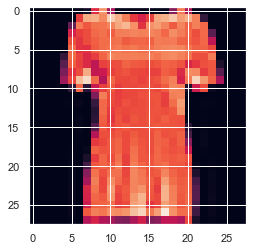

In [14]:
print(plt.imshow(train_x[10]))


AxesImage(54,36;334.8x217.44)


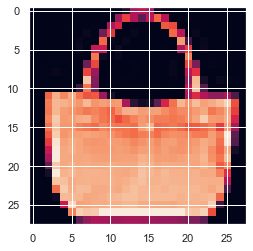

In [15]:
print(plt.imshow(train_x[100]))


AxesImage(54,36;334.8x217.44)


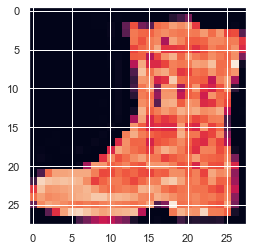

In [16]:
print(plt.imshow(train_x[150]))

AxesImage(54,36;334.8x217.44)


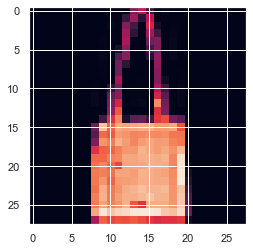

In [17]:
print(plt.imshow(train_x[200]))


AxesImage(54,36;334.8x217.44)


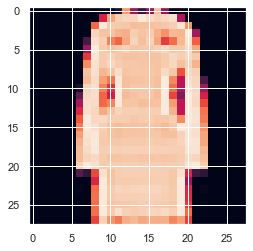

In [18]:
print(plt.imshow(train_x[500]))


AxesImage(54,36;334.8x217.44)


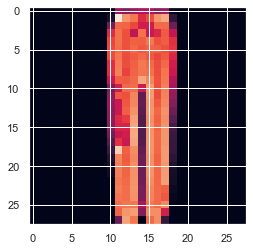

In [19]:
print(plt.imshow(train_x[1000]))


AxesImage(54,36;334.8x217.44)


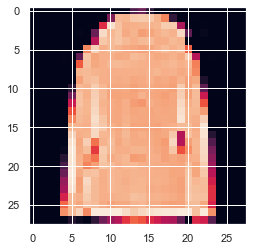

In [20]:
print(plt.imshow(train_x[2000]))


AxesImage(54,36;334.8x217.44)


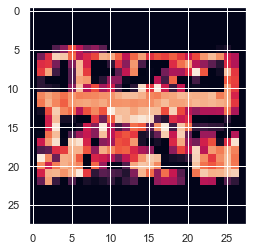

In [21]:
print(plt.imshow(train_x[10000]))


AxesImage(54,36;334.8x217.44)


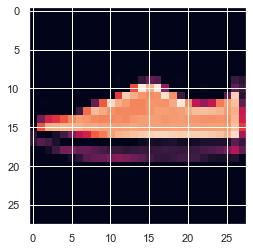

In [22]:
print(plt.imshow(train_x[20000]))


AxesImage(54,36;334.8x217.44)


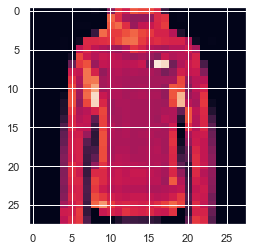

In [23]:
print(plt.imshow(train_x[45000]))


AxesImage(54,36;334.8x217.44)


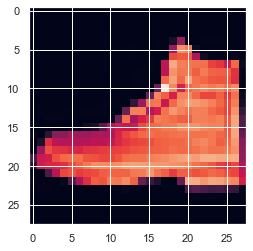

In [25]:
print(plt.imshow(train_x[50000]))


AxesImage(54,36;334.8x217.44)


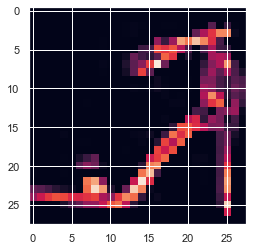

In [26]:
print(plt.imshow(train_x[8]))


AxesImage(54,36;334.8x217.44)


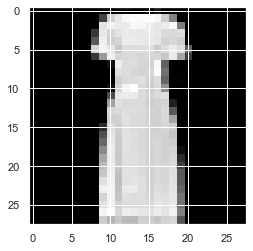

In [27]:
print(plt.imshow(train_x[50],cmap="gray"))


AxesImage(54,36;334.8x217.44)


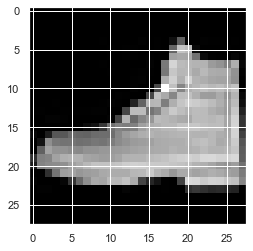

In [28]:
print(plt.imshow(train_x[50000],cmap="gray"))


AxesImage(54,36;334.8x217.44)


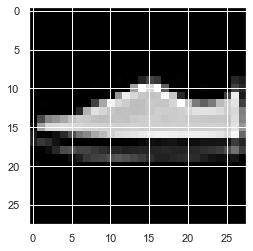

In [29]:
print(plt.imshow(train_x[20000],cmap="gray"))


In [30]:
train_x=train_x.reshape(-1,28,28,1)
test_x=test_x.reshape(-1,28,28,1)
train_x.shape,test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [32]:
test_x[10]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [145],
        [190],
        [ 97],
        [109],
        [105],
        [187],
        [ 76],
        [  0],
        [  0],
        [  0],
        [  2],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 64],
        [170],
        [163],
        [208],
        [243],
        [240],
        [229],
        [173],
        [162],
        [154],
        [ 18],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 39],
        [158],
        [196],
      

In [33]:
train_x=train_x/255
test_x=test_x/255

In [34]:
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [35]:
print(np.unique(train_y))

[0 1 2 3 4 5 6 7 8 9]


In [36]:
print(np.unique(test_y))

[0 1 2 3 4 5 6 7 8 9]


In [37]:
from keras.utils import to_categorical

In [38]:
train_y_one_hot=to_categorical(train_y)
test_y_one_hot=to_categorical(test_y)

In [39]:
train_y_one_hot[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
from sklearn.model_selection import train_test_split
train_x,hold_x,train_label,hold_label=train_test_split(train_x,train_y_one_hot,test_size=0.25,random_state=121)

In [41]:
train_x.shape,hold_x.shape,train_label.shape,hold_label.shape

((45000, 28, 28, 1), (15000, 28, 28, 1), (45000, 10), (15000, 10))

In [42]:
from keras.layers import Conv2D,MaxPool2D
from keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential

In [43]:
fm=Sequential()
fm.add(Conv2D(48,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
fm.add(MaxPool2D(2,2))


fm.add(Flatten())
fm.add(Dense(10,activation="softmax"))

In [44]:
fm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 48)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8112)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81130     
Total params: 81,610
Trainable params: 81,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
fm.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [49]:
train=fm.fit(train_x,train_label,batch_size=2000,epochs=10,verbose=2)

Epoch 1/10
23/23 - 23s - loss: 0.1024 - accuracy: 0.8146
Epoch 2/10
23/23 - 23s - loss: 0.0964 - accuracy: 0.8262
Epoch 3/10
23/23 - 20s - loss: 0.0918 - accuracy: 0.8346
Epoch 4/10
23/23 - 20s - loss: 0.0881 - accuracy: 0.8420
Epoch 5/10
23/23 - 20s - loss: 0.0849 - accuracy: 0.8480
Epoch 6/10
23/23 - 20s - loss: 0.0824 - accuracy: 0.8526
Epoch 7/10
23/23 - 23s - loss: 0.0802 - accuracy: 0.8567
Epoch 8/10
23/23 - 22s - loss: 0.0784 - accuracy: 0.8606
Epoch 9/10
23/23 - 22s - loss: 0.0766 - accuracy: 0.8631
Epoch 10/10
23/23 - 21s - loss: 0.0750 - accuracy: 0.8672


In [47]:
train.epoch

[0, 1, 2, 3, 4]

In [48]:
train.params

{'verbose': 1, 'epochs': 5, 'steps': 23}